
# Logistic Regression Project

In this project we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Importing a few libraries which we'll be needing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file.**

In [2]:
ad_data = pd.read_csv(r"C:\Users\hkdtu\Projects\Logistic Regression (Intern Resume)\advertising.csv")

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55868.450080,180.000100,0.481000,0.50000
std,15.853615,8.785562,26295.327717,43.902339,0.499889,0.50025
min,32.600000,19.000000,1000.540000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47117.162500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57023.600000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65497.567500,218.792500,1.000000,1.00000
max,91.430000,61.000000,713841.570000,269.960000,1.000000,1.00000


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55868.450080,180.000100,0.481000,0.50000
std,15.853615,8.785562,26295.327717,43.902339,0.499889,0.50025
min,32.600000,19.000000,1000.540000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47117.162500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57023.600000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65497.567500,218.792500,1.000000,1.00000
max,91.430000,61.000000,713841.570000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!
** Creating a histogram of the Age**

Text(0.5, 0, 'Age')

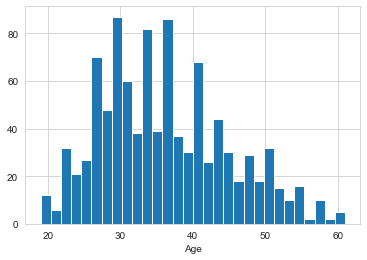

In [7]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Creating a jointplot showing Area Income versus Age.**

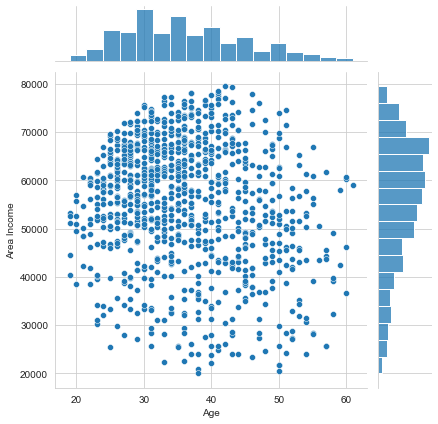

In [40]:
sns.jointplot(x='Age',y='Area Income', data=ad_data)

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

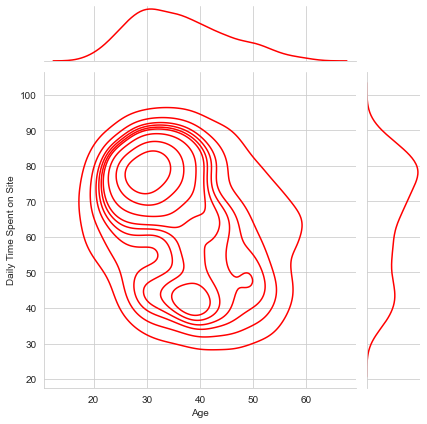

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

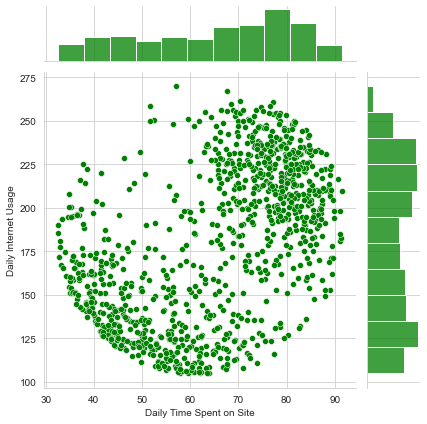

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

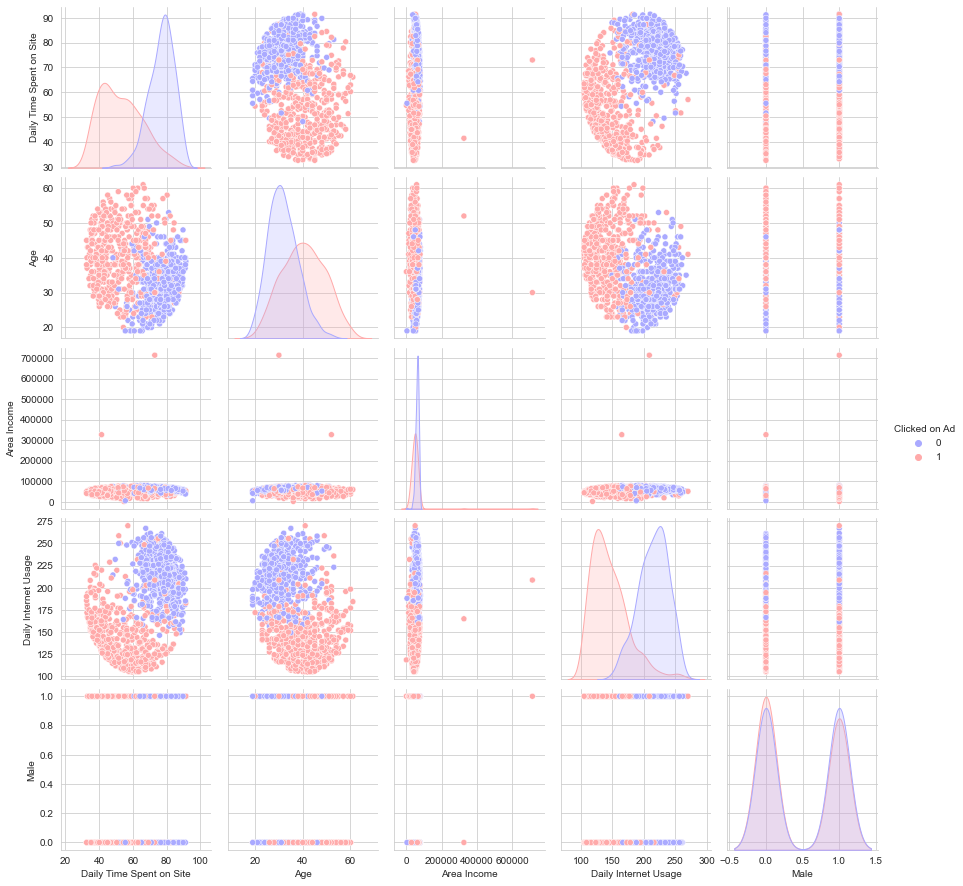

In [11]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# OUTLIERS TREATMENT

In [12]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


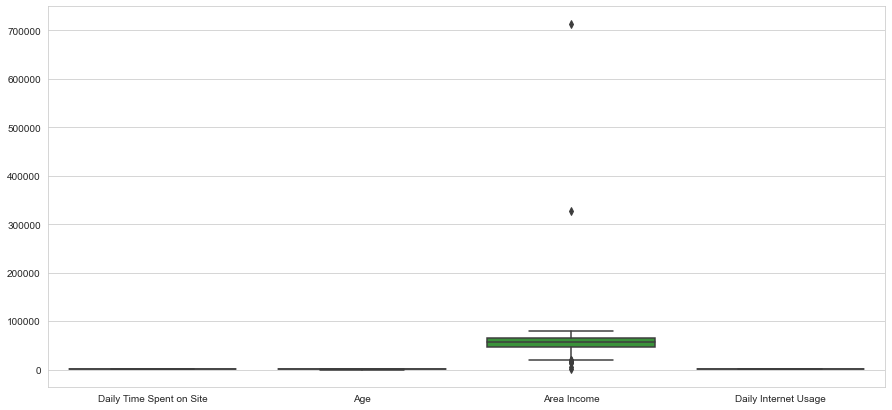

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(data = ad_data[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']])
plt.show()

we have outliers lets remove them

In [14]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [15]:
ad_data['Area Income']=remove_outlier_IQR(ad_data['Area Income'])
ad_data.dropna(inplace=True)

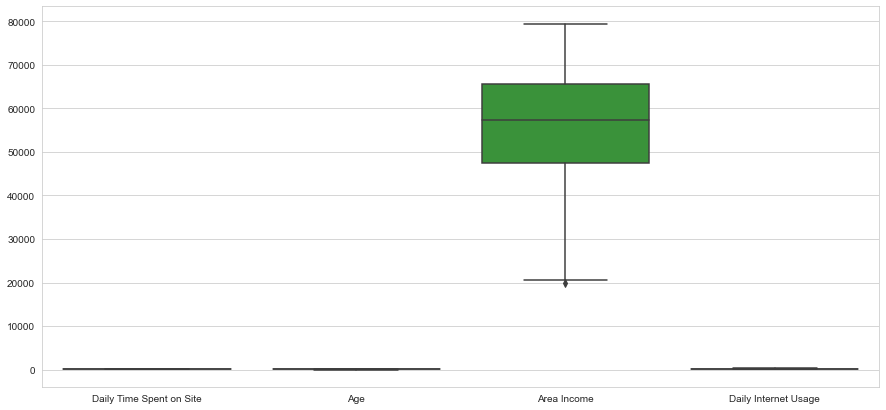

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(data = ad_data[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']])
plt.show()

In [17]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       987 non-null    int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      987 non-null    float64
 4   Ad Topic Line             987 non-null    object 
 5   City                      987 non-null    object 
 6   Male                      987 non-null    int64  
 7   Country                   987 non-null    object 
 8   Timestamp                 987 non-null    object 
 9   Clicked on Ad             987 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 84.8+ KB


# Logistic Regression

Now it's time to do a train test split, and train our model!


**Splitting the data into training set and testing set using train_test_split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Training and fitting a logistic regression model on the training set.**

In [21]:
import statsmodels.api as sm
logmodel = sm.Logit( y_train, X_train)

In [22]:
logit_res = logmodel.fit()

Optimization terminated successfully.
         Current function value: 0.248606
         Iterations 8


In [23]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  661
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.6413
Time:                        11:12:54   Log-Likelihood:                -164.33
converged:                       True   LL-Null:                       -458.08
Covariance Type:            nonrobust   LLR p-value:                7.858e-126
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0567      0.010     -5.659      0.000      -0.076      -0.037
Age                          0.2566      0.021     12.398      0.000       0.216       0.

**p value of male is high lets drop it**

In [24]:
X1 = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']]
y1= ad_data['Clicked on Ad']

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [26]:
import statsmodels.api as sm
logmodel1 = sm.Logit( y1_train, X1_train)

In [27]:
logit_res1 = logmodel1.fit()

Optimization terminated successfully.
         Current function value: 0.249138
         Iterations 8


In [28]:
print(logit_res1.summary())

                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  661
Model:                          Logit   Df Residuals:                      657
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.6405
Time:                        11:12:55   Log-Likelihood:                -164.68
converged:                       True   LL-Null:                       -458.08
Covariance Type:            nonrobust   LLR p-value:                7.340e-127
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0566      0.010     -5.649      0.000      -0.076      -0.037
Age                          0.2568      0.021     12.446      0.000       0.216       0.

p value of area income is also higher than .05

In [29]:
X2 = ad_data[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']]
y2= ad_data['Clicked on Ad']

In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [31]:
logmodel2 = sm.Logit( y2_train, X2_train)

In [32]:
logit_res2 = logmodel2.fit()

Optimization terminated successfully.
         Current function value: 0.249149
         Iterations 8


In [33]:
print(logit_res2.summary())

                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  661
Model:                          Logit   Df Residuals:                      658
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Aug 2022   Pseudo R-squ.:                  0.6405
Time:                        11:12:55   Log-Likelihood:                -164.69
converged:                       True   LL-Null:                       -458.08
Covariance Type:            nonrobust   LLR p-value:                3.818e-128
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0569      0.010     -5.865      0.000      -0.076      -0.038
Age                          0.2563      0.020     12.792      0.000       0.217       0.

## Predictions and Evaluations
** Now predict values for the testing data.**

In [34]:
predictions = logit_res2 .predict(X2_test)


In [35]:
predictions_form=[]
for i in predictions:
    if i >= 0.5:
               i=1
    else: i = 0
    predictions_form.append(i)

In [36]:
predictions_form

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


**Creating a classification report for the model.**

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y2_test,predictions_form))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       174
           1       0.93      0.88      0.90       152

    accuracy                           0.91       326
   macro avg       0.91      0.91      0.91       326
weighted avg       0.91      0.91      0.91       326



## Great Job!